<a href="https://colab.research.google.com/github/16sl75/business-analytics-project_2021_08_18/blob/main/location_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycountry
!pip install geograpy3
!pip install mip


     |████████████████████████████████| 10.1MB 4.7MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=dc8a513002b511718098778d6a7964b9f4ad27110da2d3d798e202ca28d74e24
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
     |████████████████████████████████| 1.5MB 5.7MB/s 
     |████████████████████████████████| 92kB 6.9MB/s 
     |████████████████████████████████| 215kB 11.1MB/s 
     |████████████████████████████████| 92kB 7.3MB/s 
     |████████████████████████████████| 7.4MB 1.1MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 235kB 42.6MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=390083752c239bb7b049d2da8564e3a5bd105ff550189362fd62f155f40123ee
  Stored in directory: /root/.cache/pip/wheels/83/

In [ ]:
import pycountry
text = "United States (New York), United Kingdom (London)".lower()
for country in pycountry.countries:
    if country.name.lower() in text:
        print(country.name)


United Kingdom
United States


In [ ]:
import geograpy
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
url = 'http://www.bbc.com/news/world-europe-26919928'
places = geograpy.get_place_context(url="https://www.nytimes.com/2015/10/04/travel/places-where-hemingway-lived-or-traveled.html")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
print(places)

countries=['Spain', 'Gabon', 'Germany', 'France', 'Colombia', 'Mexico', 'United States', 'Canada']
regions=['Lost', 'PARIS', 'San Fermín', 'North', 'Madrid', 'Bell', 'Pamplona', 'Chicago', 'Spain', 'Hemingway', 'PARK', 'OAK', 'Afternoon', 'Park Avenue', 'Hadley Richardson', 'Paris', 'Cervecería Alemana', 'Left Bank', 'Spanish Civil War', 'Michigan', 'Horton Bay', 'Ernest Hemingway', 'El Callejón']
cities=['Paris', 'Bell', 'Pamplona', 'Madrid', 'Hemingway', 'North', 'Chicago', 'Michigan']
other=['North']


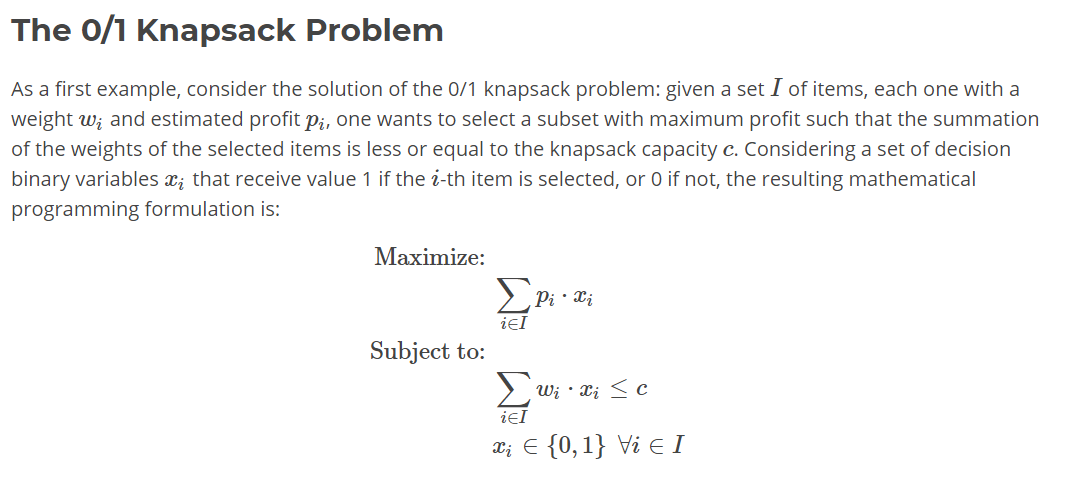

*X1 = 1, X2= 1*

## Example of using Mixed integer programs
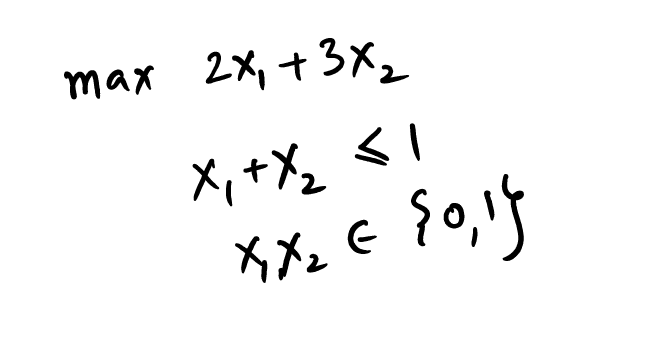


In [ ]:
from mip import Model, xsum, maximize, BINARY

A = [1, 1]
B = [2, 3]
I = range(0,len(A))
c = 1

m = Model("Example")

x = [m.add_var(var_type=BINARY) for i in I]

m.objective = maximize(xsum(B[i] * x[i] for i in I))

m += xsum(A[i] * x[i] for i in I) <= c

m.optimize()

selected = [i for i in I if x[i].x >= 0.99]
print("selected items: {}".format(selected))

selected items: [0]


## Write the code for knapsack

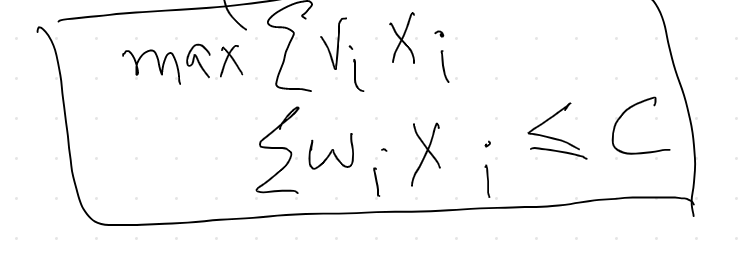

In [ ]:
v = [10, 13, 18, 30, 7, 15]
w = [11, 15, 20, 36, 10, 33]
c, I = 47, range(len(w))

m = Model("Example")

x = [m.add_var(var_type=BINARY) for i in I]

m.objective = maximize(xsum(v[i] * x[i] for i in I))

m += xsum(w[i] * x[i] for i in I) <= c

m.optimize()

selected = [i for i in I if x[i].x >= 0.99]
print("selected items: {}".format(selected))


selected items: [0, 1, 2]


## Greedy Algorithm
1. sort all items from increase to decreasing by value/weight.
2. fill the knapsack with the highest ration first.
3. Return when knapsack full.

In [ ]:
import numpy as np
p = [10, 13, 18, 30, 7, 15]
w = [11, 15, 20, 36, 10, 33]
index = list(range(0,len(p)))
items = list(zip(index, p,w))
c, I = 47, range(len(w))

# Greedy Algorithm

def greedyoptimize(items, capacity):
    """
    A greedy solution to the knapsack problem.
    """
    # Initialize variables
    weight = 0
    value = 0
    taken = [0]*len(items)
     
    # Sort input by value / weight
    sort = sorted(items,key = lambda x: x[1]/x[2], reverse=True)
     
    # Take highest value per weight items first
    for item in sort:
        if weight + item[2] <= capacity:
            taken[item[0]] = 1
            value += item[1]
            weight += item[2]
             
    # Output format
    output_data = str(value) + '\n'
    output_data += ' '.join(map(str, taken))
     
    return output_data
greedyoptimize(items, c) 

   

'41\n1 1 1 0 0 0'

## Greedy Algorithm Travelling Salesman

1.   Starts at an arbitrary city
2.  Go to the next closest unvisited city
1.   Repeat (2) until all cities have been visited, save path length
2.   Start again at (1) with a diferent initial city.
1.   Repeat (1-4) until all possibilities have been exausted and return the shortest path


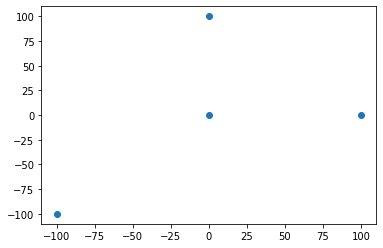

In [ ]:
cities = np.array([(0,0),(100,0),(0,100), (-100,-100)])
import matplotlib.pyplot as plt
plt.scatter(x = [c[0] for c in cities], y = [c[1] for c in cities])

In [ ]:
import numpy as np

def algorithm(cities):
	best_order = []
	best_length = float('inf')

	for i_start, start in enumerate(cities):
		order = [i_start]
		length = 0
    ### complete the get_closest function
		i_next, next, dist =   get_closest(start, cities, order)
		length += dist
		order.append(i_next)

		while len(order) < cities.shape[0]:
			i_next, next, dist = get_closest(next, cities, order)
			length += dist
			order.append(i_next)

		#print(order)

		if length < best_length:
			best_length = length
			best_order = order
			
	return best_order, best_length

def get_closest(city, cities, visited):
	best_distance = float('inf')

	for i, c in enumerate(cities):

		if i not in visited:
			distance = dist_squared(city, c)

			if distance < best_distance:
				closest_city = c
				i_closest_city = i
				best_distance = distance

	return i_closest_city, closest_city, best_distance


def dist_squared(c1, c2):
	t1 = c2[0] - c1[0]
	t2 = c2[1] - c1[1]

	return t1**2 + t2**2

algorithm(cities)

([3, 0, 1, 2], 50000)

In [ ]:
distances = [2,3,10]
            [1/2, 1/3, 1/10]